In [1]:
import numpy as np

# 加载数据
black_data = np.load('plot2_noisy_5/black_region_noisy.npy')  # 黑色区域
red_data = np.load('plot2_noisy_5/red_region_noisy.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_5/features.npy', features)  # 保存打乱的特征数组
np.save('plot2_noisy_5/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


打乱后的特征数组形状： (5500, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[ 0.44649676 -0.2220791 ]
 [ 0.25642243  0.35278098]
 [ 0.5527114  -0.35292701]
 [-0.19042491  0.93677067]
 [-0.22413116  0.29319979]]
前5个标签： [0 0 1 0 0]


In [2]:
import numpy as np

# 加载数据
black_data_test = np.load('plot2_noisy_5/black_region_noisy_test.npy')  # 黑色区域
red_data_test = np.load('plot2_noisy_5/red_region_noisy_test.npy')      # 红色区域

# 提取坐标
black_x_test = black_data_test[0, :]
black_y_test = black_data_test[1, :]
red_x_test = red_data_test[0, :]
red_y_test = red_data_test[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features_test = np.column_stack((black_x_test, black_y_test))  # 黑色特征
red_features_test = np.column_stack((red_x_test, red_y_test))       # 红色特征

black_target_test = np.zeros((black_features_test.shape[0],), dtype=int)  # 黑色标签：0
red_target_test = np.ones((red_features_test.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features_test = np.vstack((black_features_test, red_features_test))  # 合并所有特征
targets_test = np.hstack((black_target_test, red_target_test))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features_test.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features_test = features_test[indices]  # 按打乱后的索引重排特征
targets_test = targets_test[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_5/features_test.npy', features_test)  # 保存打乱的特征数组
np.save('plot2_noisy_5/targets_test.npy', targets_test)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features_test.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features_test[:5])
print("前5个标签：", targets_test[:5])


打乱后的特征数组形状： (550, 2)
打乱后的标签数组形状： (5500,)
前5个特征：
 [[ 0.41584869 -0.02378141]
 [ 0.09003737 -0.47922586]
 [-0.9158851  -0.34911161]
 [-0.33509304  1.01635468]
 [-0.54356119 -0.32255073]]
前5个标签： [0 0 0 0 1]


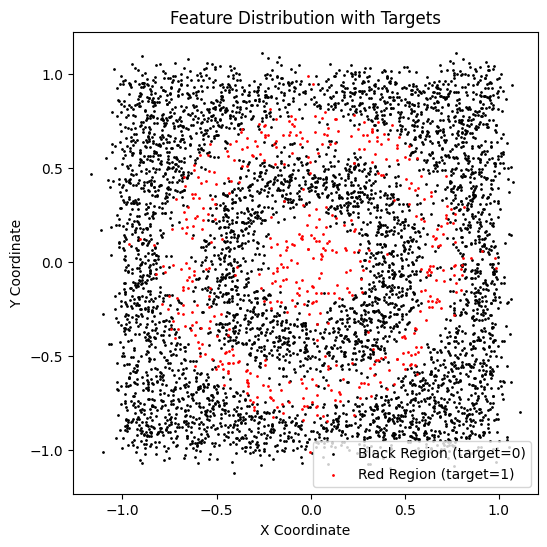

In [3]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('plot2_noisy_5/features.npy')
y = np.load('plot2_noisy_5/targets.npy')

X_test = np.load('plot2_noisy_5/features_test.npy')
y_test = np.load('plot2_noisy_5/targets_test.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



Begin to train.... - 2024-12-14 21:18:39,638 - DualGranularBalancedDeepForest
the shape of training samples: (5500, 2) - 2024-12-14 21:18:39,638 - DualGranularBalancedDeepForest
use gmean as training evaluation - 2024-12-14 21:18:39,638 - DualGranularBalancedDeepForest
stacking: False, save model: False - 2024-12-14 21:18:39,639 - DualGranularBalancedDeepForest
-----------------------------------------layer-0-------------------------------------------- - 2024-12-14 21:18:39,641 - DualGranularBalancedDeepForest
The shape of x_train is (5500, 2) - 2024-12-14 21:18:39,641 - DualGranularBalancedDeepForest


Training UncertaintyAwareDeepForest...


layer_0, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9345, f1_score=0.7654, auc=0.9339, gmean=0.6790, sen=0.4700, spe=0.9810, aupr=0.6425 - 2024-12-14 21:18:41,876 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9200, f1_score=0.7164, auc=0.8910, gmean=0.6235, sen=0.4000, spe=0.9720, aupr=0.5177 - 2024-12-14 21:18:41,881 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9336, f1_score=0.7582, auc=0.9045, gmean=0.6648, sen=0.4500, spe=0.9820, aupr=0.6080 - 2024-12-14 21:18:41,886 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9355, f1_score=0.7674, auc=0.9186, gmean=0.6794, sen=0.4700, spe=0.9820, aupr=0.6572 - 2024-12-14 21:18:41,891 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9409, f1_score=0.7822, auc=0.9138, gmean=0.6883, sen=0.4800, spe=0.9870, aupr=0.6622 - 2024-12-14 21:18:41,896 - KFoldWrapper
layer_0, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 0
num_layers: 1


layer_1, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9418, f1_score=0.8224, auc=0.9147, gmean=0.8057, sen=0.6700, spe=0.9690, aupr=0.6639 - 2024-12-14 21:18:51,873 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9273, f1_score=0.7760, auc=0.9038, gmean=0.7470, sen=0.5800, spe=0.9620, aupr=0.5909 - 2024-12-14 21:18:51,878 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9236, f1_score=0.7603, auc=0.9104, gmean=0.7207, sen=0.5400, spe=0.9620, aupr=0.5896 - 2024-12-14 21:18:51,883 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9336, f1_score=0.7946, auc=0.9262, gmean=0.7676, sen=0.6100, spe=0.9660, aupr=0.6365 - 2024-12-14 21:18:51,888 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9327, f1_score=0.8018, auc=0.9023, gmean=0.7960, sen=0.6600, spe=0.9600, aupr=0.6493 - 2024-12-14 21:18:51,893 - KFoldWrapper
layer_1, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 1
num_layers: 2


layer_2, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9545, f1_score=0.8573, auc=0.9271, gmean=0.8337, sen=0.7100, spe=0.9790, aupr=0.7281 - 2024-12-14 21:19:03,846 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9518, f1_score=0.8587, auc=0.9446, gmean=0.8642, sen=0.7700, spe=0.9700, aupr=0.7665 - 2024-12-14 21:19:03,850 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9418, f1_score=0.8344, auc=0.9379, gmean=0.8490, sen=0.7500, spe=0.9610, aupr=0.7248 - 2024-12-14 21:19:03,855 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9382, f1_score=0.8147, auc=0.9170, gmean=0.8041, sen=0.6700, spe=0.9650, aupr=0.6956 - 2024-12-14 21:19:03,859 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9491, f1_score=0.8474, auc=0.9247, gmean=0.8419, sen=0.7300, spe=0.9710, aupr=0.7441 - 2024-12-14 21:19:03,863 - KFoldWrapper
layer_2, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 2
num_layers: 3


layer_3, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9482, f1_score=0.8350, auc=0.9312, gmean=0.8030, sen=0.6600, spe=0.9770, aupr=0.7539 - 2024-12-14 21:19:16,783 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9591, f1_score=0.8698, auc=0.9312, gmean=0.8413, sen=0.7200, spe=0.9830, aupr=0.7780 - 2024-12-14 21:19:16,788 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9555, f1_score=0.8621, auc=0.9418, gmean=0.8449, sen=0.7300, spe=0.9780, aupr=0.8058 - 2024-12-14 21:19:16,793 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9609, f1_score=0.8812, auc=0.9346, gmean=0.8739, sen=0.7800, spe=0.9790, aupr=0.8198 - 2024-12-14 21:19:16,798 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9482, f1_score=0.8425, auc=0.9023, gmean=0.8307, sen=0.7100, spe=0.9720, aupr=0.7368 - 2024-12-14 21:19:16,804 - KFoldWrapper
layer_3, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 3
num_layers: 4


layer_4, estimator_0, ExtraTreesClassifier, n_fold_0,Accuracy=0.9536, f1_score=0.8400, auc=0.9027, gmean=0.7763, sen=0.6100, spe=0.9880, aupr=0.7605 - 2024-12-14 21:19:28,542 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_1,Accuracy=0.9555, f1_score=0.8568, auc=0.9402, gmean=0.8232, sen=0.6900, spe=0.9820, aupr=0.8144 - 2024-12-14 21:19:28,546 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_2,Accuracy=0.9600, f1_score=0.8708, auc=0.9319, gmean=0.8363, sen=0.7100, spe=0.9850, aupr=0.7932 - 2024-12-14 21:19:28,551 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_3,Accuracy=0.9673, f1_score=0.8973, auc=0.9427, gmean=0.8770, sen=0.7800, spe=0.9860, aupr=0.8344 - 2024-12-14 21:19:28,556 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, n_fold_4,Accuracy=0.9618, f1_score=0.8779, auc=0.9478, gmean=0.8480, sen=0.7300, spe=0.9850, aupr=0.8426 - 2024-12-14 21:19:28,560 - KFoldWrapper
layer_4, estimator_0, ExtraTreesClassifier, wrappe

Final enhanced_vector_cur_layer type: <class 'numpy.ndarray'>
enhanced_vector_cur_layer shape: (5500, 10)
num_layers_before_append: 4
num_layers: 5
last_layer_index 3
last_layer_index 3
UncertaintyAwareDeepForest - Accuracy: 0.9509
UncertaintyAwareDeepForest - AUC: 0.9544
UncertaintyAwareDeepForest - AUPR: 0.7418
UncertaintyAwareDeepForest - Sensitivity: 0.6600
UncertaintyAwareDeepForest - Specificity: 0.9800
UncertaintyAwareDeepForest - G-Mean: 0.8042
UncertaintyAwareDeepForest - F1 Macro: 0.8414


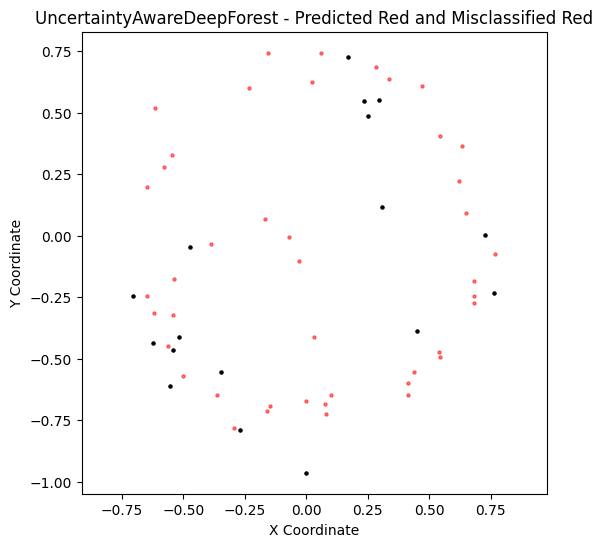

In [10]:
import os
# 配置输出文件夹
output_dir = "plot2_noisy_5"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]
    

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


Training BalanceCascade...
BalanceCascade - Accuracy: 0.9327
BalanceCascade - AUC: 0.9507
BalanceCascade - AUPR: 0.7364
BalanceCascade - Sensitivity: 0.8400
BalanceCascade - Specificity: 0.9420
BalanceCascade - G-Mean: 0.8895
BalanceCascade - F1 Macro: 0.8282
Training SelfPacedEnsemble...
Majority class detected: 0
SelfPacedEnsemble - Accuracy: 0.9309
SelfPacedEnsemble - AUC: 0.9617
SelfPacedEnsemble - AUPR: 0.7274
SelfPacedEnsemble - Sensitivity: 0.8000
SelfPacedEnsemble - Specificity: 0.9440
SelfPacedEnsemble - G-Mean: 0.8690
SelfPacedEnsemble - F1 Macro: 0.8196
Training UnderBagging...
UnderBagging - Accuracy: 0.9000
UnderBagging - AUC: 0.9588
UnderBagging - AUPR: 0.7028
UnderBagging - Sensitivity: 0.8800
UnderBagging - Specificity: 0.9020
UnderBagging - G-Mean: 0.8909
UnderBagging - F1 Macro: 0.7790
Training EasyEnsemble...
EasyEnsemble - Accuracy: 0.6364
EasyEnsemble - AUC: 0.7671
EasyEnsemble - AUPR: 0.2322
EasyEnsemble - Sensitivity: 0.9400
EasyEnsemble - Specificity: 0.6060
Eas

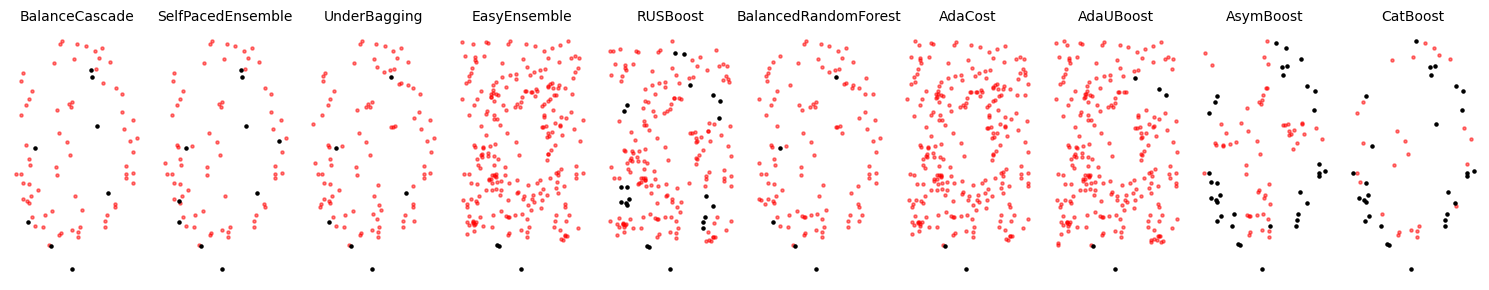

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "plot2_noisy_5"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    'AdaCost': AdaCostClassifier(n_estimators=50),
    'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    'AsymBoost': AsymBoostClassifier(n_estimators=50),
    'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]
    

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


Training OverBagging...
OverBagging - Accuracy: 0.9418
OverBagging - AUC: 0.9371
OverBagging - AUPR: 0.7188
OverBagging - Sensitivity: 0.5800
OverBagging - Specificity: 0.9780
OverBagging - G-Mean: 0.7532
OverBagging - F1 Macro: 0.8064
Training SMOTEBoost...
SMOTEBoost - Accuracy: 0.6745
SMOTEBoost - AUC: 0.7994
SMOTEBoost - AUPR: 0.3017
SMOTEBoost - Sensitivity: 0.8800
SMOTEBoost - Specificity: 0.6540
SMOTEBoost - G-Mean: 0.7586
SMOTEBoost - F1 Macro: 0.5574
Training OverBoost...
OverBoost - Accuracy: 0.6600
OverBoost - AUC: 0.7917
OverBoost - AUPR: 0.3077
OverBoost - Sensitivity: 0.8000
OverBoost - Specificity: 0.6460
OverBoost - G-Mean: 0.7189
OverBoost - F1 Macro: 0.5376
Training KmeansSMOTEBoost...
KmeansSMOTEBoost - Accuracy: 0.7673
KmeansSMOTEBoost - AUC: 0.7200
KmeansSMOTEBoost - AUPR: 0.3138
KmeansSMOTEBoost - Sensitivity: 0.3800
KmeansSMOTEBoost - Specificity: 0.8060
KmeansSMOTEBoost - G-Mean: 0.5534
KmeansSMOTEBoost - F1 Macro: 0.5459
Training SMOTEBagging...
SMOTEBagging - 

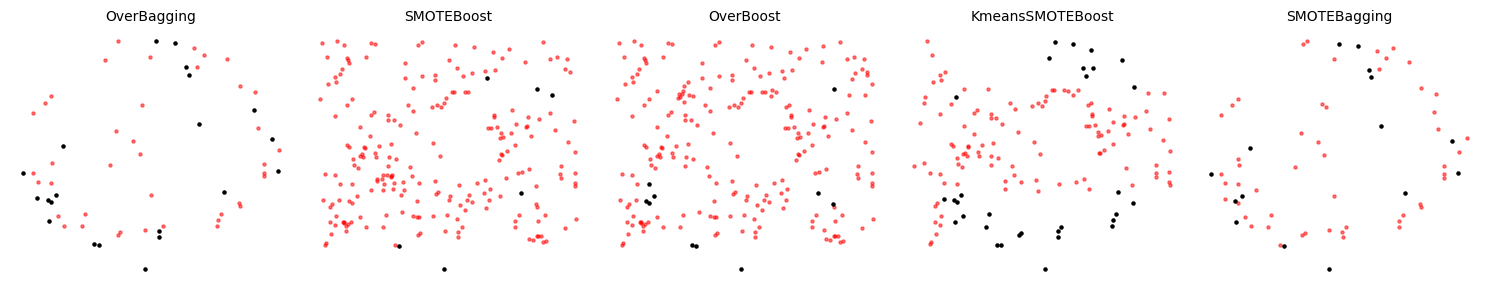

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "plot2_noisy_5"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()
